# پروژه تحلیل رفتاری و پیش‌بینی ارزش طول عمر مشتری برای یک فروشگاه آنلاین
ارزش طول عمر مشتری=Customer Lifetime Value

## آماده‌سازی و تمیزکاری اولیه

### 1. ایمپورت کتابخانه‌ها:

In [1]:
import pandas as pd
import numpy as np

### 2. خواندن فایل:

In [2]:
df = pd.read_excel("Online Retail.xlsx")

### 3. بررسی اولیه:

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


###  4. تمیزکاری اولیه:

#### حذف ردیف‌های بدون CustomerID

In [5]:
df = df[df['CustomerID'].notnull()]

#### حذف مقادیر منفی در Quantity یا UnitPrice (برگشتی‌ها):

In [6]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#### تبدیل ستون تاریخ

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#### ساخت ستون TotalPrice

In [8]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## تحلیل اکتشافی اولیه (EDA)

هدفمون اینه که:

- ببینیم با چه نوع مشتری‌هایی سروکار داریم

- رفتار خرید رو بشناسیم

- الگوهای پنهان رو کشف کنیم

### 1. تعداد مشتری‌ها:

In [24]:
df['CustomerID'].nunique()

4338

### 2. پراکندگی کشورها (Top 5 کشور):

In [10]:
df['Country'].value_counts().head(5)

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: count, dtype: int64

### 3. پرفروش‌ترین کالاها:

In [11]:
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

### 4. میانگین و مجموع فروش

In [12]:
df['TotalPrice'].sum(), df['TotalPrice'].mean()

(8911407.904, 22.396999889415003)

###  5. تعداد خرید در ماه

In [13]:
df['Month'] = df['InvoiceDate'].dt.month
df['Month'].value_counts().sort_index()

Month
1     21229
2     19927
3     27175
4     22642
5     28320
6     27185
7     26825
8     27007
9     40028
10    49554
11    64531
12    43461
Name: count, dtype: int64

### 6. نمودار توزیع فروش بر اساس تعداد فاکتور در ماه

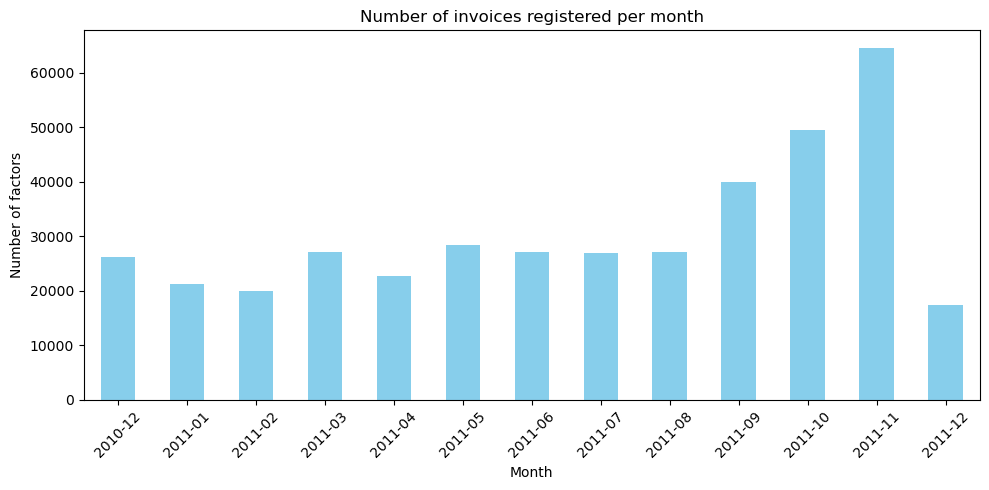

In [22]:
import matplotlib.pyplot as plt

# تعداد فاکتورها در هر ماه
monthly_sales = df['InvoiceDate'].dt.to_period('M').value_counts().sort_index()

# رسم نمودار
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Number of invoices registered per month')
plt.xlabel('Month')
plt.ylabel('Number of factors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## RFM Analysis

هدف:

برای هر مشتری ۳ عدد محاسبه کنیم:

- Recency: چند روز از آخرین خریدش گذشته؟

- Frequency: چند بار خرید کرده؟

- Monetary: چقدر هزینه کرده؟

### 1: تعیین تاریخ تحلیل 

In [49]:
import datetime as dt

# تاریخ مرجع برای محاسبه recency
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

#reference_date = dt.datetime.today()

### 2: ساخت جدول RFM

In [50]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# تغییر نام ستون‌ها
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


### 3. تحلیل عددی روی Recency, Frequency, Monetary

#### خلاصه آماری:

In [27]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


####  نمودار توزیع برای هرکدوم:

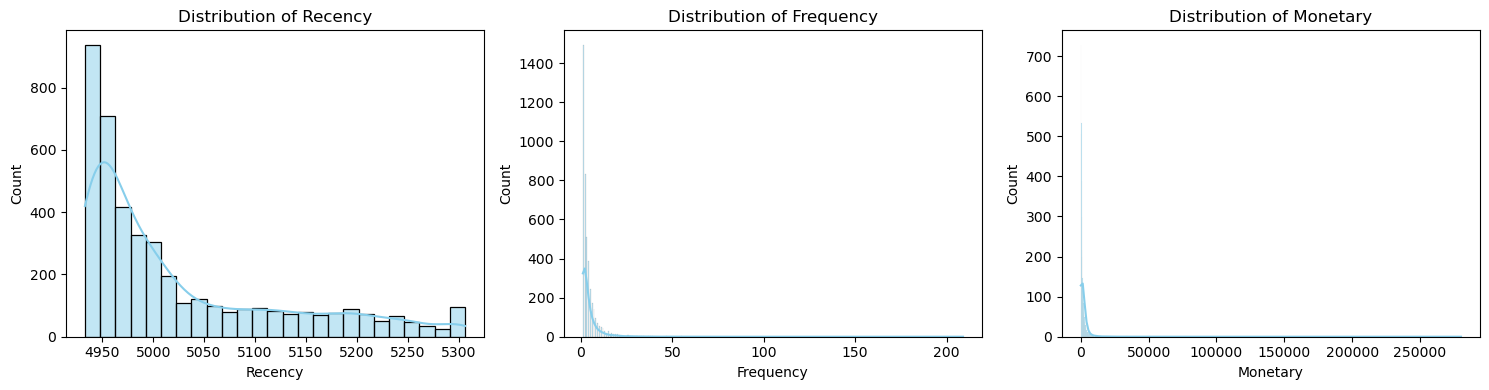

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
for i, col in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## نرمال‌سازی با StandardScaler

 چرا نرمال‌سازی؟

چون RFM عددهایی با مقیاس‌های خیلی متفاوت داره:

  Recency: مثلاً 5 تا 300 روز

  Frequency: 1 تا 50 بار

  Monetary: 0 تا چند هزار!

KMeans فاصله‌ها رو مقایسه می‌کنه → باید مقیاس برابر باشه

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

## Clustering

### رسم نمودار آرنج برای تعیین تعداد خوشه بهینه

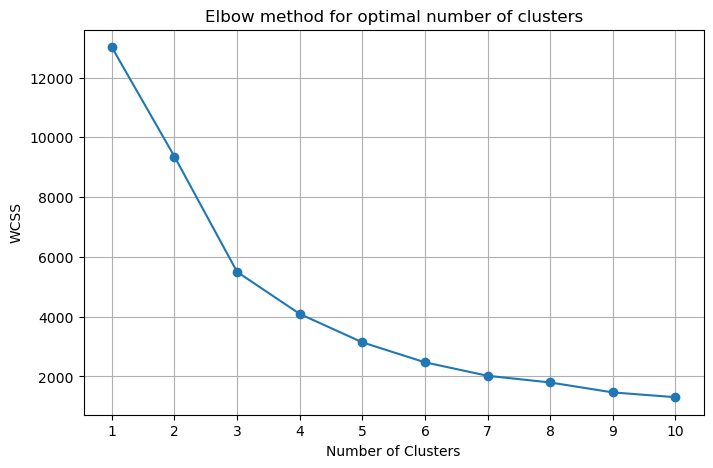

In [55]:
wcss = []
from sklearn.cluster import KMeans

# تست از 1 تا 10 خوشه
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# رسم نمودار
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow method for optimal number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**نکته: بهترین نقطه‌ دقیقاً بین 3 و 4 خوشه**

 سه خوشه: ساده‌تر، خوشه‌ها معمولاً واضح‌تر
 
 چهار خوشه: جزئیات بیشتر، شاید تمایز دقیق‌تری در مشتری‌ها

In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

### تحلیل خوشه‌ها

میانگین RFM برای هر خوشه:

In [69]:
rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

,Recency,Frequency,Monetary
Cluster,,,
0,43.7,3.7,1359.0
1,248.1,1.6,480.6
2,7.4,82.5,127338.3
3,15.5,22.3,12709.1


### بصری‌سازی خوشه‌ها با PCA

#### اجرای PCA

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)

#### ساخت DataFrame بصری‌سازی

In [71]:
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = rfm['Cluster']

#### رسم نمودار خوشه‌ها

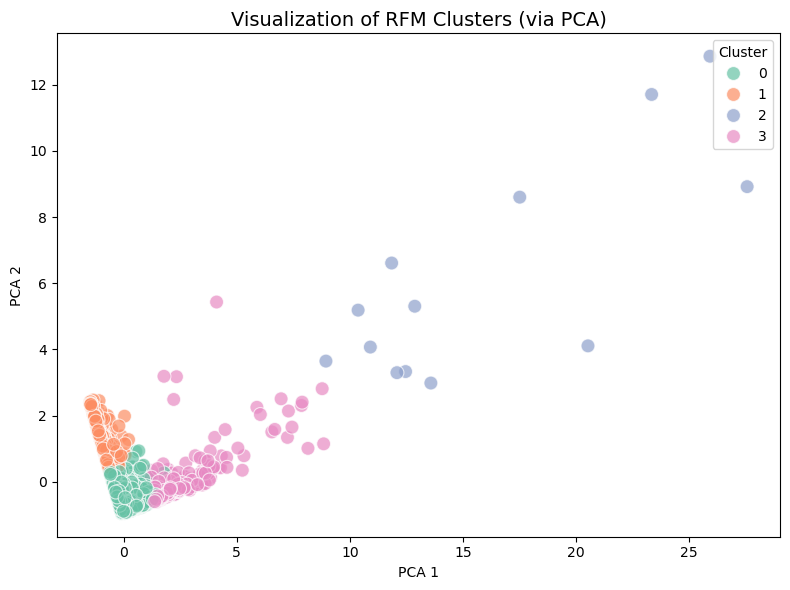

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set2',
    alpha=0.7,
    s=100
)

plt.title('Visualization of RFM Clusters (via PCA)', fontsize=14)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

این نمودار نشون می‌ده که:

- خوشه‌ها از هم جدا هستن یا در هم پیچیدن؟

- آیا خوشه‌ای خیلی متراکم یا پخش شده‌ست؟ 

- مشتری‌های VIP یا رهاشده توی کدوم ناحیه هستن؟

##### ۱. چرا خوشه‌ها به هم چسبیدن؟

- داده‌های RFM فقط ۳ ویژگی دارن (Recency, Frequency, Monetary)

- مقادیر خیلی از مشتری‌ها در این سه ویژگی به هم نزدیکه

- PCA فقط ۲ محور می‌سازه و ممکنه جداکنندگی کامل رو نشون نده
(ممکنه در بعد سوم یا چهارم خوشه‌ها کاملاً جدا باشن)

#####  ۲. آیا به معنی بد بودن خوشه‌بندیه؟

نه لزوماً ❌

چسبیدن خوشه‌ها در نمودار PCA فقط نشون می‌ده:

-  بین بعضی از خوشه‌ها تداخل نسبی هست

-  ولی هنوز ممکنه از نظر ویژگی‌های عددی کاملاً معنی‌دار و جدا باشن

### پروفایل رفتاری مشتری

#### ساخت جدول summary برای هر خوشه

In [73]:
summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].agg(
    ['mean', 'median', 'min', 'max']
).round(1)

summary

Recency                  Frequency                  Monetary  \
           mean median  min  max      mean median min  max      mean   
Cluster                                                                
0          43.7   32.0    1  163       3.7    3.0   1   15    1359.0   
1         248.1  243.0  143  374       1.6    1.0   1   12     480.6   
2           7.4    2.0    1   39      82.5   63.0   2  209  127338.3   
3          15.5    5.0    1  372      22.3   19.0   1   93   12709.1   

                                      
           median      min       max  
Cluster                               
0           829.3      6.2   21429.4  
1           310.5      3.8    9864.3  
2        117379.6  33719.7  280206.0  
3          8037.7   1296.4   77183.6

**:تحلیل خروجی**

- خوشه 0:

مشتری معمولی یا تازه‌وارد

Recency متوسط، Frequency کم، Monetary پایین

- خوشه 1:

مشتری غیرفعال یا رهاشده

Recency خیلی زیاد، خرید و هزینه کم

- خوشه 2:

مشتری وفادار و VIP

Recency بسیار کم، Frequency و Monetary بسیار بالا

- خوشه 3:

 مشتری فعال و خوب

Recency کم، Frequency و Monetary بالا


In [78]:
profile = {
    2: "VIP: وفادار، پرتکرار، ولخرج",
    3: "فعال: اخیراً خرید کرده، خرید زیاد و متوسط",
    0: "معمولی یا جدید: خرید کم، نه خیلی قدیم",
    1: "خاموش‌شده: دیر خرید کرده، خرید کم و هزینه پایین"
}

rfm['Segment'] = rfm['Cluster'].map(profile)

In [79]:
rfm['Segment']

0             فعال: اخیراً خرید کرده، خرید زیاد و متوسط
1                 معمولی یا جدید: خرید کم، نه خیلی قدیم
2                 معمولی یا جدید: خرید کم، نه خیلی قدیم
3                 معمولی یا جدید: خرید کم، نه خیلی قدیم
4       خاموش‌شده: دیر خرید کرده، خرید کم و هزینه پایین
                             ...                       
4333    خاموش‌شده: دیر خرید کرده، خرید کم و هزینه پایین
4334    خاموش‌شده: دیر خرید کرده، خرید کم و هزینه پایین
4335              معمولی یا جدید: خرید کم، نه خیلی قدیم
4336          فعال: اخیراً خرید کرده، خرید زیاد و متوسط
4337              معمولی یا جدید: خرید کم، نه خیلی قدیم
Name: Segment, Length: 4338, dtype: object

## مدلسازی پیش بینی

### هدف مدل: آیا یک مشتری در آینده به خوشه "خاموش‌شده"  خواهد رفت یا نه؟

(آیا مشتری داره غیرفعال می‌شه؟)

#### تعریف مسئله:

ما یه مدل طبقه‌بندی (classification) می‌سازیم که:

    ورودی: Recency، Frequency، Monetary

    خروجی: ۱ (خاموش شده) یا ۰ (نه)

####  ۱: آماده‌سازی داده

In [81]:
# هدف: آیا مشتری در Cluster 1 هست؟
rfm['Inactive'] = (rfm['Cluster'] == 1).astype(int)

# ویژگی‌ها
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Inactive']


#### ۲: تقسیم داده

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### ۳: ساخت مدل

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### ۴: ارزیابی مدل

In [86]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[655   0]
 [  0 213]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       655
           1       1.00      1.00      1.00       213

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



**خروجی مدل:**

- accuracy: 1.00 (100٪ دقت):

مدل همه چیز رو درست پیش‌بینی کرده

- precision و recall برای هر کلاس هم 1.00:

بدون اشتباه!

**سؤال مهم: آیا این خوبه یا زیادی خوبه؟**

ممکنه:

- مدل خیلی ساده شده باشه (مثلاً داده‌ها خیلی تمیز و جدا بودن)

- یا شاید overfitting اتفاق افتاده (مدل فقط همون داده رو حفظ کرده)

- یا شاید واقعاً داده‌ها قابل تفکیک کامل بودن

**چطور مطمئن بشیم؟**

- یه بار با مدل ساده‌تر مثل Logistic Regression تست کنیم

- از cross-validation یا داده‌ی جدید برای تست استفاده کنیم

- مهم‌تر: بررسی کنیم که آیا ویژگی‌هایی که استفاده کردیم (R, F, M) واقعاً منطقی جدا کردن یا نه

**نتیجه‌گیری:**

 - اگه واقعاً مشتری‌های خاموش‌شده رفتار کاملاً متفاوتی دارن، این مدل به‌درد کمپین‌های برگشت مشتری می‌خوره 
 
 - می‌تونی براشون ایمیل یا تخفیف ویژه ارسال کنیم  

 - یا هشدار بدیم که «مشتری در خطر از دست رفتنه »

## ساخت داشبورد PowerBI

### آماده‌سازی فایل برای PowerBI

1.ساخت فایل CSV از RFM نهایی:

In [87]:
rfm.to_csv("rfm_clusters.csv", index=False)

2.فایل rfm_clusters.csv رو تو Power BI وارد کنیم: 

از Power BI Desktop → Home > Get Data > Text/CSV

### ویژوال‌هایی که میسازیم

-  Pie chart یا Bar chart:

تعداد مشتری در هر خوشه

-  Column chart:

میانگین Recency, Frequency, Monetary برای هر خوشه

- Table:

CustomerID + Segment + Monetary

- Slicer:

فیلتر خوشه‌ها یا Segment

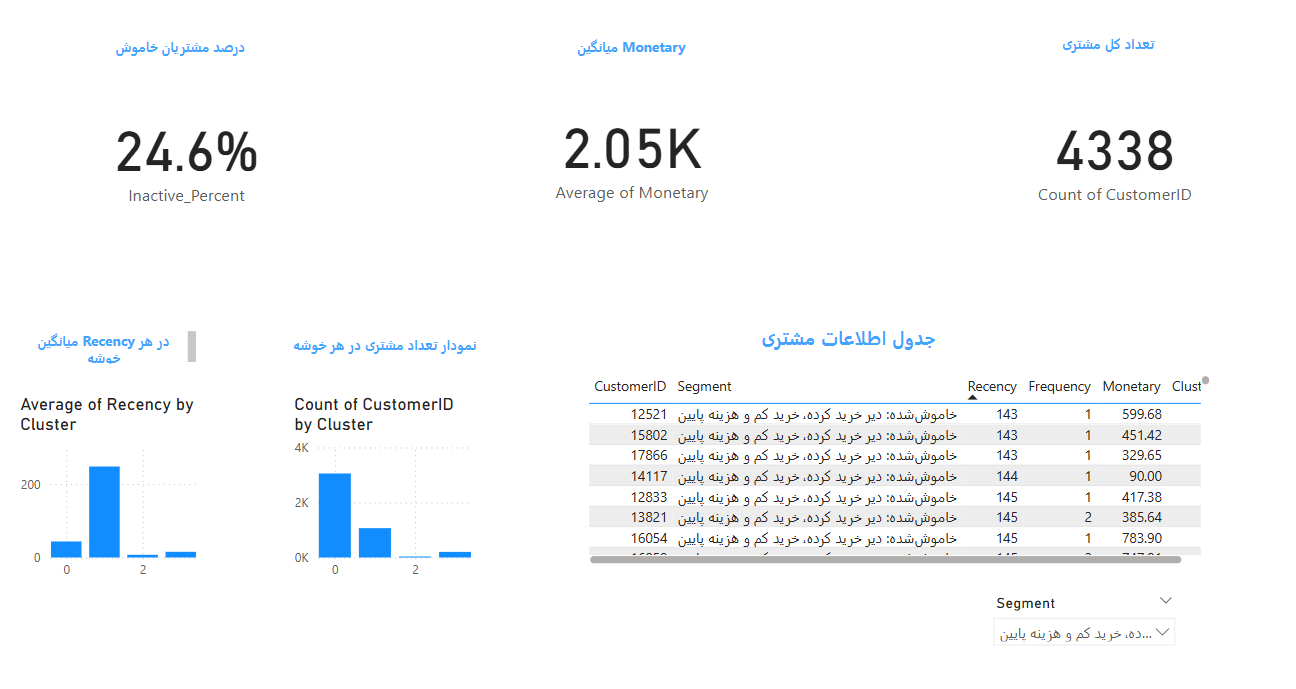

## نسخه آنلاین با Streamlit

 هدف:
    
- ساخت اپ  Streamlit برای نمایش:
    
-  اطلاعات RFM مشتری‌ها
    
-   خوشه‌ها و Segment
    
-  جدول فیلترشونده
    
  - نمودار خوشه‌بندی با انتخاب دسته‌بندی

### 1: آماده‌سازی محیط
نصب Streamlit:

In [88]:
pip install streamlit

###  2: ساخت فایل app.py

ساختن یک فایل جدید به نام: app.py

import streamlit as st

import pandas as pd

#خواندن داده

df = pd.read_csv('rfm_clusters.csv')

st.title("📊 داشبورد تحلیلی مشتریان")

#انتخاب Segment

segment = st.selectbox("یک Segment انتخاب کن:", options=df['Segment'].unique())

#فیلتر داده بر اساس Segment

filtered = df[df['Segment'] == segment]

#نمایش داده‌ها

st.subheader("📋 لیست مشتریان در این Segment:")

st.dataframe(filtered[['CustomerID', 'Recency', 'Frequency', 'Monetary']])

#آمار کلیدی

st.subheader("📈 آمار خلاصه:")

st.metric("تعداد مشتری", len(filtered))

st.metric("میانگین Monetary", round(filtered['Monetary'].mean(), 2))


### 3: اجرای برنامه

تو همون فولدر فایل app.py، توی ترمینال یا آناکوندا:

streamlit run app.py

و صفحه Streamlit باز می‌شه با URL مثل:

http://localhost:8501

### 4: گسترش اپ

- اضافه کردن نمودار خوشه‌ها

- KPI ها

- جستجوی CustomerID

- و در نهایت Deploy روی Cloud (مثلاً Streamlit Cloud یا Render)